In [1]:
import tensorflow as tf ##pip install tensorflow
import numpy as np #pip install numpy
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE =256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
plant_images = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation",
    shuffle=True,
    # Add other parameters as needed, such as image size, batch size, etc.
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 60343 files belonging to 38 classes.


In [4]:
class_names =plant_images.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Lea

In [5]:
len(plant_images)

1886

In [6]:
for image_batch,label_batch in plant_images.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[29 33 15 37 28 35 16 28 13 29 28 32  1  8  0 35 11 17  3 28 23 32 26 28
 10  7 24 16 35 13 35 15]


 let's analyze what each part signifies:

(32, 256, 256, 3):

This is the shape of your image_batch. It indicates several things about your dataset:
32: There are 32 images in this batch.
256, 256: Each image has a resolution of 256x256 pixels.
3: Each image has 3 color channels, typically representing RGB (Red, Green, Blue).
The array of numbers:

This array represents the labels associated with each of the 32 images in your batch.
The numbers (2, 9, 17, 16, ...) are likely categorical labels assigned to each image. For example, in a plant classification task, each number could correspond to a specific type of plant.
The fact that these labels are numerical (as opposed to textual descriptions) is typical in machine learning, where classes are often encoded as integers for efficiency.
This output is typical in machine learning tasks involving image classification. Each image in your batch has a corresponding label, which is used by the model to learn to associate specific visual patterns in the images with the correct classification labels.

In [7]:
for image_batch,label_batch in plant_images.take(7):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[24 19  9 24 33  2 31 37 24 30 28 35 10 35 23  1 20 35 32 24 29  7 33 24
 10 32 24 21 12 12 24 10]
(32, 256, 256, 3)
[35 14 16  3  8 19 15 12  0 37 15 15 15 25  1  6 32 18 30 15 24  4 32 15
 35 25 35 15 35 11 16 33]
(32, 256, 256, 3)
[18 26  6 29 25 28 23 35 36 12 13 15 33 35 35 13 33 12 26 26 34 20 21 35
 25 31 25 17 24 15 35 11]
(32, 256, 256, 3)
[27 24 17  3  5 20 24 15 33 12 21  7 15 19 28  0  1 35  7 28 23 35 35 28
 32 21 20  7 24 33 24  6]
(32, 256, 256, 3)
[33 22 30 25 26 17 25 12 30 13 15 34 31  0 21 29  4 15 24  3 35  5 34 22
  8 37 32 24 12 30 36 12]
(32, 256, 256, 3)
[28 36 15 16  1 16 32 35 28 12 25 34 15 24 29 14 35  9 36 12 16 36 15 36
 35 25 35 24  6  8  3 15]
(32, 256, 256, 3)
[28 26 15 35 24 25 15 10 15 36 24 15  4 35 24 14 19 24 37 24 34 13 34 16
 24 26  6  6 35 28 35 29]


In [8]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0])

tf.Tensor(
[[[124. 116. 127.]
  [135. 127. 138.]
  [149. 141. 152.]
  ...
  [150. 144. 156.]
  [154. 148. 160.]
  [160. 154. 166.]]

 [[129. 121. 132.]
  [130. 122. 133.]
  [122. 114. 125.]
  ...
  [149. 143. 155.]
  [158. 152. 164.]
  [171. 165. 177.]]

 [[135. 127. 138.]
  [134. 126. 137.]
  [110. 102. 113.]
  ...
  [167. 161. 173.]
  [165. 159. 171.]
  [162. 156. 168.]]

 ...

 [[157. 151. 161.]
  [173. 167. 177.]
  [137. 131. 141.]
  ...
  [194. 191. 202.]
  [181. 178. 189.]
  [178. 175. 186.]]

 [[143. 137. 147.]
  [121. 115. 125.]
  [133. 127. 137.]
  ...
  [192. 189. 200.]
  [186. 183. 194.]
  [176. 173. 184.]]

 [[138. 132. 142.]
  [154. 148. 158.]
  [175. 169. 179.]
  ...
  [177. 174. 185.]
  [179. 176. 187.]
  [160. 157. 168.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0].numpy())

[[[165. 157. 155.]
  [166. 158. 156.]
  [147. 139. 137.]
  ...
  [186. 176. 174.]
  [176. 166. 164.]
  [144. 134. 132.]]

 [[186. 178. 176.]
  [186. 178. 176.]
  [165. 157. 155.]
  ...
  [156. 146. 144.]
  [159. 149. 147.]
  [151. 141. 139.]]

 [[163. 155. 153.]
  [166. 158. 156.]
  [154. 146. 144.]
  ...
  [142. 132. 130.]
  [171. 161. 159.]
  [162. 152. 150.]]

 ...

 [[150. 136. 133.]
  [160. 146. 143.]
  [172. 158. 155.]
  ...
  [147. 136. 130.]
  [142. 131. 125.]
  [132. 121. 115.]]

 [[180. 166. 163.]
  [165. 151. 148.]
  [165. 151. 148.]
  ...
  [144. 133. 127.]
  [175. 164. 158.]
  [146. 135. 129.]]

 [[162. 148. 145.]
  [139. 125. 122.]
  [140. 126. 123.]
  ...
  [144. 133. 127.]
  [122. 111. 105.]
  [130. 119. 113.]]]


In [10]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0].shape)
    

(256, 256, 3)


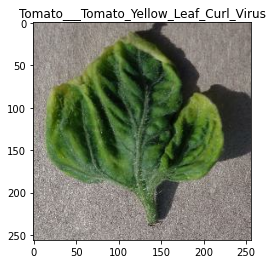

In [11]:

# Looping through the first batch of the dataset
for image_batch, label_batch in plant_images.take(1):
    # Selecting the first image from the batch and converting it to a uint8 type
    first_image = image_batch[0].numpy().astype("uint8")

    # Displaying the image
    plt.imshow(first_image)
    plt.title(class_names[label_batch[0]])
    plt.show()

    

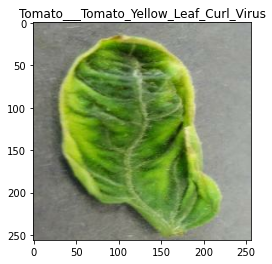

In [12]:
# Skipping the first batch and then taking the next one
for image_batch, label_batch in plant_images.skip(1).take(1):
    # Selecting the first image from this (second) batch
    first_image_batch2 = image_batch[0].numpy().astype("uint8")

    # Displaying the image
    plt.imshow( first_image_batch2)
    plt.title(class_names[label_batch[0]])
    plt.show()

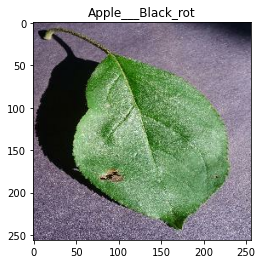

In [13]:

# Skipping the first 3 batches and then taking the next one
for image_batch, label_batch in plant_images.skip(3).take(1):
    # Selecting the sixth image from this fourth batch
    sixth_image = image_batch[5].numpy().astype("uint8")

    # Displaying the image
    plt.imshow(sixth_image)
    # Adding a title to the image using the class name corresponding to the label
    plt.title(class_names[label_batch[5]])
    plt.show()


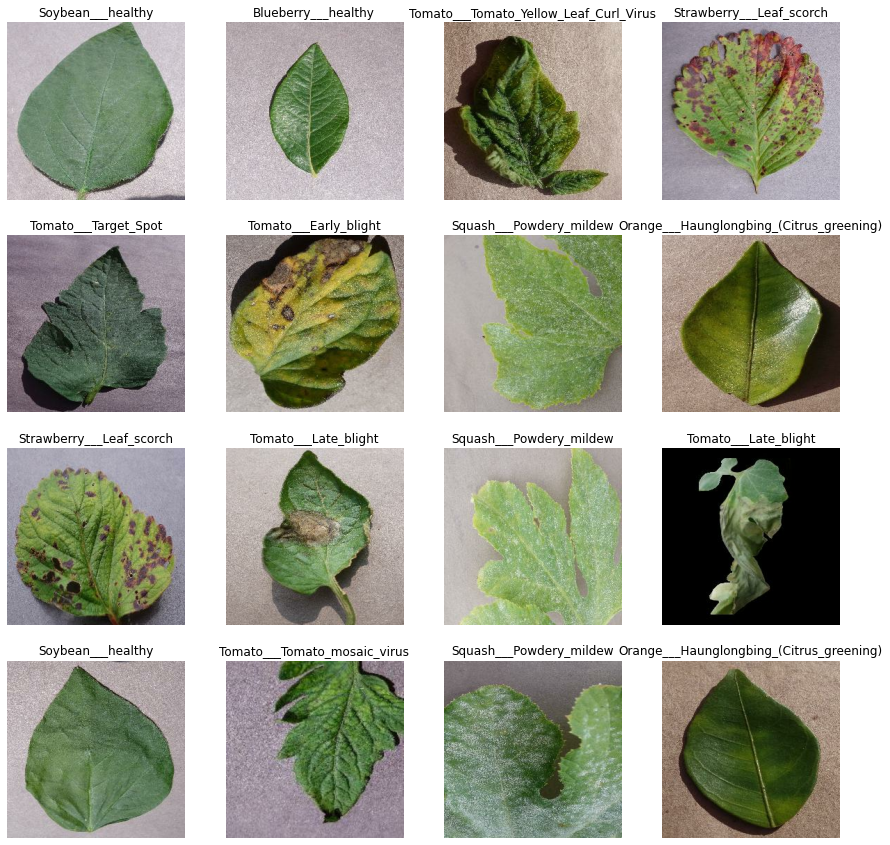

In [14]:
# Setting the figure size
plt.figure(figsize=(15,15))

# Iterating over the first batch
for image_batch, label_batch in plant_images.take(1):
    # Looping through the first 16 images
    for i in range(16):
        # Creating a subplot for each image
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

# Displaying the plot
plt.show()

        
    

80%==> training
20%==> 10% validation,10% test

In [15]:
train_size = 0.8
len(plant_images)*train_size

1508.8000000000002

In [16]:
train_ds=plant_images.take(1537)
len (train_ds)

1537

In [17]:
test_ds= plant_images.skip(1537)
len (test_ds)

349

In [18]:
val_size=0.1
len(plant_images)*val_size

188.60000000000002

In [19]:
val_ds=test_ds.take(192)
len(val_ds)

192

In [20]:
testing_ds =test_ds.skip(192)
len(testing_ds)

157

In [21]:
import tensorflow as tf

def shuffle_and_split_dataset(dataset, train_split=0.8, val_split=0.1, shuffle_size=1000):
    """
    Shuffle and split a TensorFlow dataset into training, validation, and test sets.

    Parameters:
    - dataset: TensorFlow dataset to be split.
    - train_split: Percentage of the dataset to be used for training (default 80%).
    - val_split: Percentage of the dataset to be used for validation (default 10%).
    - shuffle_size: Number of elements to shuffle.

    Returns:
    - A tuple (train_dataset, val_dataset, test_dataset), each as a TensorFlow dataset.
    """

    # Ensure that the train and validation splits add up to less than 1
    assert train_split + val_split < 1

    # Shuffle the dataset
    dataset = dataset.shuffle(shuffle_size, seed = 12)

    # Calculate split sizes
    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = dataset_size - train_size - val_size

    # Split the dataset
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)

    return train_dataset, val_dataset, test_dataset


In [22]:
train_data, val_data, test_data = shuffle_and_split_dataset(plant_images)



In [23]:
len(train_data)

1508

In [24]:
# Optimizing the train_data pipeline
train_data = train_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Now, train_data is optimized for training a model
# You can use train_data in your model training loop or with model.fit


In [25]:
# Optimizing the validation data pipeline
val_data = val_data.cache().prefetch(tf.data.AUTOTUNE)

# Optimizing the test data pipeline
test_data = test_data.cache().prefetch(tf.data.AUTOTUNE)

# Now, val_data and test_data are optimized for evaluation and testing


In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
    

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes= 3

In [29]:
plant_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Fewer Conv2D and MaxPooling2D layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

plant_model.build(input_shape=input_shape)

In [30]:
plant_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 128, 128, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 64, 64, 64)          0         
 g2D)                                                 

In [31]:
plant_model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False), metrics=['accuracy'])

In [ ]:
history = plant_model.fit(
    train_data,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data =val_data
)


Epoch 1/20
